# Workshop 6: Exercises Answers

This notebook provides asnwers to the practical excercises in the **HJ-SS_WP6-Practial.ipynb** notebook for participants to check their solutions against. The code and output in this notebook is collapsed (hidded), please click on the 3 dots in the code cells to be able to see the solution (code and associated plot). *Please attempt to solve the exercises yourself before going through the answers.*

### Exercise 1: How hot were the summer holidays of 2003?

Please plot mean temperature (variable name is "tas") for the whole of August 2003 as a spatial plot over UK in degree celsius. Please use the CHESS air temperature data stored in the JASMIN GroupWorkspace (/gws/nopw/j04/hydro_jules/data/uk/driving_data/chess/chess-met/daily/chess-met_tas_gb_1km_daily_20030801-20030831.nc) and the netCDF4 package.
   
    HINT: 0°C = 273.15K. You can find support for this solution in the Section "1km daily precipitation data" of HJ-SS_Workshop-4.ipynb.

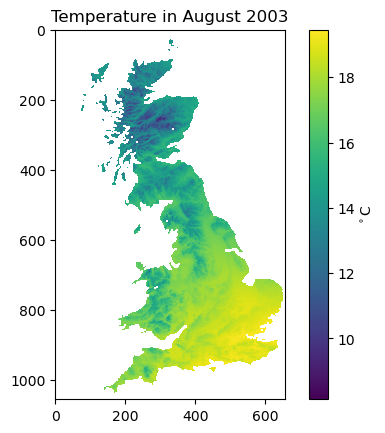

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib inline

path = '/gws/nopw/j04/hydro_jules/data/uk/driving_data/chess/chess-met/daily/'
file = 'chess-met_tas_gb_1km_daily_20030801-20030831.nc'

my_dataset = nc.Dataset(path+file)
my_mean = my_dataset['tas'][:].mean(axis=0)
my_plot = my_mean[::-1,:] - 273.15
my_dataset.close()

plt.imshow(my_plot)
plt.title('Temperature in August 2003')
cb = plt.colorbar()
cb.set_label('$^\circ$C')

### Exercise 2: Is London really warmer than Edinburgh?

Compare the monthly mean temperature difference between London and Edinburgh for all the months in 2000. Please use the CHESS air temperature (variable name "tas") data stored in the JASMIN GroupWorkspace (/gws/nopw/j04/hydro_jules/data/uk/driving_data/chess/chess-met/daily/chess-met_tas_gb_1km_daily_2000*.nc) and the xarray package.

    HINT: Use Easting (X) = 529500 and Northing (Y) = 179500 for London | Easting (X) = 332500 and Northing (Y) = 673500 for Edinburgh. You can find support for this solution in the Section "Xarray" of HJ-SS_Workshop-4.ipynb.

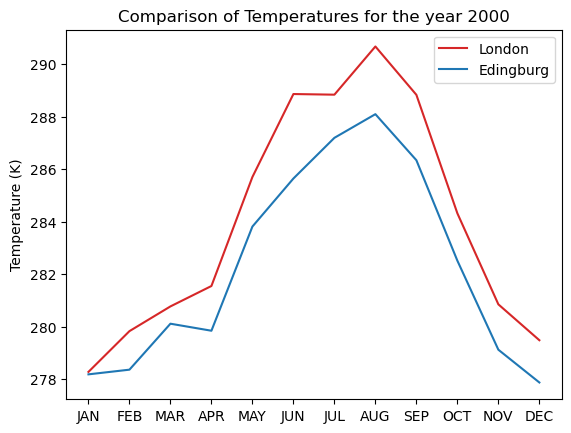

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initialise a file name variable along with its path
path = '/gws/nopw/j04/hydro_jules/data/uk/driving_data/chess/chess-met/daily/'
files = 'chess-met_tas_gb_1km_daily_2000*.nc'

# Read the netCDF file using xarray
my_dataset = xr.open_mfdataset(path+files)['tas']
my_edingburg = my_dataset.sel(x=332500, y=673500).groupby('time.month').mean()
my_london    = my_dataset.sel(x=529500, y=179500).groupby('time.month').mean()

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

plt.plot(my_london, color='tab:red', label='London')
plt.plot(my_edingburg, color='tab:blue', label='Edingburg')
plt.xticks(np.arange(0,12), months)
plt.ylabel('Temperature (K)')
plt.title('Comparison of Temperatures for the year 2000')
plt.legend()
plt.show()

### Exercise 3: Is UK being effected by the warming of the globe?

What was the maximum temperature spread for 1st May 2015 for the whole of UK? How does this compare against the spread of temperature for the whole of UK in each subsequent decades later till 2055 (i.e., 1 May 2025, 2035, 2045 and 2055) compared as boxplots? Please use the Ensemble memeber number 01 of the CHESS-SCAPE data stored in JASMIN Object Store (via the catalogue.yaml file used in the notebooks before) and the xarray package.
   
    HINT: Use the yaml catalogue file from the training course. You can find support for this solution in the Section "Accessing Model Data from JASMIN Object Store" of HJ-SS_Workshop-5.ipynb.

/opt/jaspy/lib/python3.11/site-packages/fsspec/registry.py:275: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)
/opt/jaspy/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


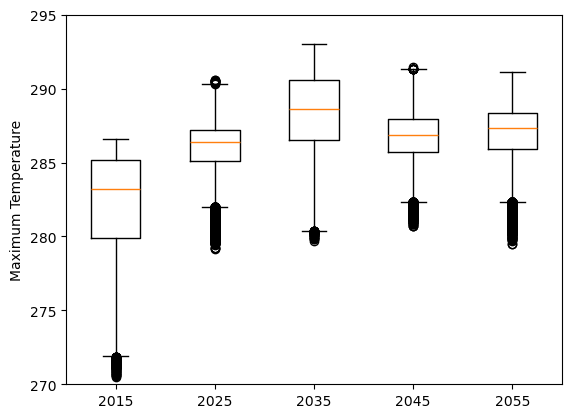

In [3]:
import intake
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

catalogue = intake.open_catalog("./catalogue.yaml")
chess_data_01 = catalogue.e01_tmax_year100km.to_dask()['tasmax']

yr = [2015, 2025, 2035, 2045, 2055]
data = []#np.zeros((len(yr))).tolist()
for y in range(len(yr)):
    #data[y] = []
    x = chess_data_01.sel(time=str(yr[y])+'-05-01').values.squeeze().flatten()
    x = x[~np.isnan(x)]
    data.append(x)

plt.boxplot(data)
plt.xticks(np.arange(1, len(yr)+1), yr)
plt.ylim(270, 295)
plt.ylabel('Maximum Temperature')
plt.show()

### Exercise 4: How have the UK temperatures changed over time?

Compare the temperature values of all UK for the long-past history (1961) to mid-history (1981) and the recent history (2001). Please compare the temperature values of the first time step (1961-01-01) vs. 7305 time step (1981-01-01) and first step (1961-01-01) vs. the 14610 time step (2001-0-01) of the CHESS at each grid point as scatter plots in the same figure? Please use the CHESS data available online here "https://eip.ceh.ac.uk/thredds/dodsC/public-chess/driving_data/aggregation/tas_aggregation" and the xarray package.
   
    HINT: You have to use the flag "decode_times=False" when reading the data into the xarray pacakge. Also the first time step is the zero time step in python as the indexing in python starts from 0. You can find support for this solution in the Sections "Read a netCDF dataset over the web" and "Xarray" of HJ-SS_Workshop-4.ipynb.

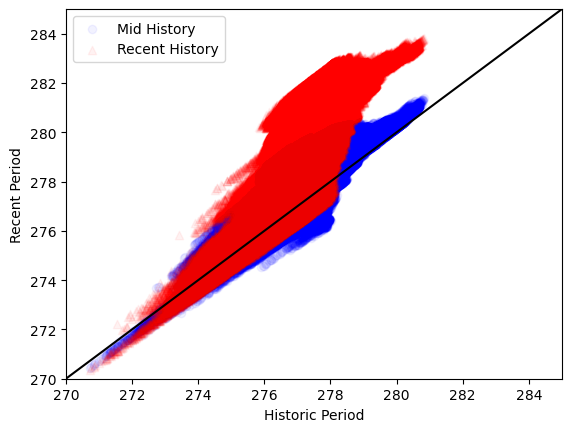

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://eip.ceh.ac.uk/thredds/dodsC/public-chess/driving_data/aggregation/tas_aggregation"
f = xr.open_dataset(url, decode_times=False)
f_past = f['tas'][0,:,:].values.flatten()
f_mid = f['tas'][7305,:,:].values.flatten()
f_recent = f['tas'][14610,:,:].values.flatten()

plt.plot(np.arange(270,286), np.arange(270,286), color='k')
plt.scatter(f_past, f_mid, color='b', marker='o', alpha=0.05, label='Mid History')
plt.scatter(f_past, f_recent, color='r', marker='^', alpha=0.05, label='Recent History')
plt.ylim(270, 285)
plt.xlim(270, 285)
plt.ylabel('Recent Period')
plt.xlabel('Historic Period')
plt.legend()
plt.show()

### Exercise 5: In which season does it rain the most in London?

Compare the precipitation difference over different seasons of London as histograms. Please use the CHESS seasonal precipitation data (variable name "precip") stored in the JASMIN GroupWorkspace (/gws/nopw/j04/hydro_jules/data/uk/driving_data/chess/chess-met/seasonal/chess-met_precip_gb_1km_seasonal_19610101-20171231.nc) and the xarray package.

    HINT: Use Easting (X) = 529500 and Northing (Y) = 179500 for London and multiply the precipitation flux by 60*60*24=86400 to convert from per second to rainfall per day. You can find support for this solution in the Section "Xarray" of HJ-SS_Workshop-4.ipynb.

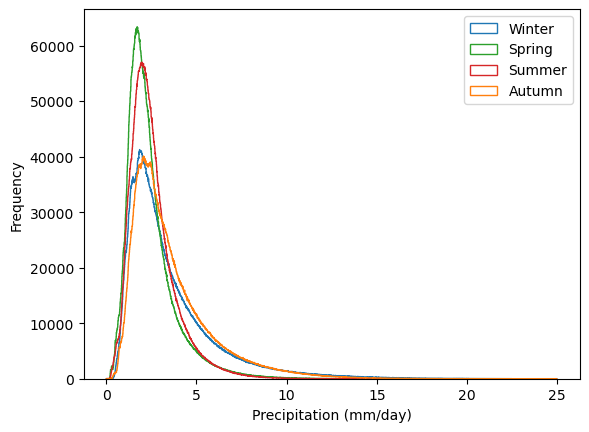

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initialise a file name variable along with its path
path = '/gws/nopw/j04/hydro_jules/data/uk/driving_data/chess/chess-met/seasonal/'
files = 'chess-met_precip_gb_1km_seasonal_19610101-20171231.nc'
my_dataset = xr.open_dataset(path+files)['precip']*86400
idx = my_dataset.groupby('time.month').groups

plt.hist(my_dataset[idx[1]].values.flatten(), bins=np.arange(0, 25, 0.01), color='tab:blue', histtype='step', label='Winter')
plt.hist(my_dataset[idx[4]].values.flatten(), bins=np.arange(0, 25, 0.01), color='tab:green', histtype='step', label='Spring')
plt.hist(my_dataset[idx[7]].values.flatten(), bins=np.arange(0, 25, 0.01), color='tab:red', histtype='step', label='Summer')
plt.hist(my_dataset[idx[10]].values.flatten(), bins=np.arange(0, 25, 0.01), color='tab:orange', histtype='step', label='Autumn')
plt.legend()
plt.xlabel('Precipitation (mm/day)')
plt.ylabel('Frequency')
plt.show()